In [4]:
import pandas as pd
import numpy as np

# Stock market prediction on ADANIPORTS
## using LSTM

In [5]:
path = r"C:\Users\Dell\Downloads\ADANIPORTS.csv"
df=pd.read_csv(path,na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


<AxesSubplot:xlabel='Date'>

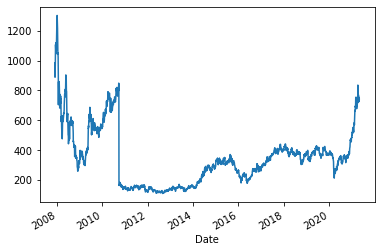

In [6]:
df['VWAP'].plot()

Setting variables & features

In [7]:
#Setting Variable
output_var = pd.DataFrame(df['VWAP'])
#Features
features = ['Open', 'High', 'Low', 'Volume']

Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2007-11-27,0.550634,0.774216,0.570576,0.279227
2007-11-28,0.728634,0.724774,0.659896,0.046763
2007-11-29,0.666251,0.662766,0.631554,0.052318
2007-11-30,0.650447,0.698406,0.673638,0.047054
2007-12-03,0.691828,0.728895,0.701121,0.030347


In [9]:
feature_transform.shape

(3322, 4)

In [10]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=11)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
print(X_train.shape)
print(X_test.shape)

(3046, 4)
(276, 4)


Data Processing For LSTM

In [12]:
#Processing data
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(3046, 1, 4)
(276, 1, 4)


Building the LSTM Model 

In [13]:
!pip install tensorflow

In [14]:
import tensorflow as tf

In [15]:
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

Training Prediction Model

In [16]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
381/381 [==============================] - 2s 2ms/step - loss: 150982.0469
Epoch 2/100
381/381 [==============================] - 1s 2ms/step - loss: 147420.1719
Epoch 3/100
381/381 [==============================] - 1s 2ms/step - loss: 138621.5469
Epoch 4/100
381/381 [==============================] - 1s 2ms/step - loss: 125454.0781
Epoch 5/100
381/381 [==============================] - 1s 2ms/step - loss: 110163.1641
Epoch 6/100
381/381 [==============================] - 1s 2ms/step - loss: 94365.4375
Epoch 7/100
381/381 [==============================] - 1s 2ms/step - loss: 79093.4375
Epoch 8/100
381/381 [==============================] - 1s 2ms/step - loss: 65032.5586
Epoch 9/100
381/381 [==============================] - 1s 2ms/step - loss: 52625.5508
Epoch 10/100
381/381 [==============================] - 1s 2ms/step - loss: 42115.0586
Epoch 11/100
381/381 [==============================] - 1s 2ms/step - loss: 33567.2148
Epoch 12/100
381/381 [=========================

381/381 [==============================] - 1s 2ms/step - loss: 43.5529
Epoch 98/100
381/381 [==============================] - 1s 2ms/step - loss: 42.4091
Epoch 99/100
381/381 [==============================] - 1s 2ms/step - loss: 41.2845
Epoch 100/100
381/381 [==============================] - 1s 2ms/step - loss: 40.1830


In [17]:
#Prediction
y_pred= lstm.predict(X_test)

9/9 [==============================] - 0s 1ms/step


Comparing Predicted vs True Adjusted Close Value – LSTM

In [18]:
import matplotlib.pyplot as plt

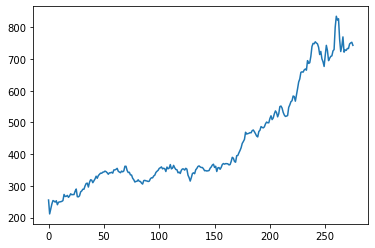

In [19]:
plt.plot(y_test, label='True Value')


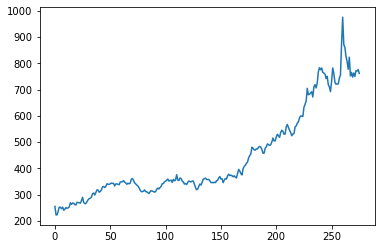

In [20]:
plt.plot(y_pred, label='LSTM Value')

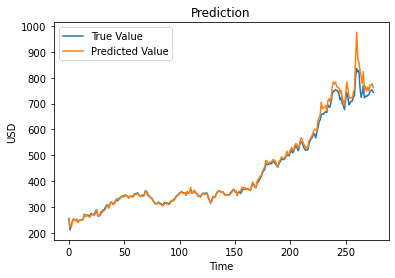

In [21]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('USD')
plt.legend()
plt.show()